In [1]:
from pandas import Series, DataFrame, read_pickle
import time
import matplotlib.pyplot as plt
from types import MethodType


def select_time(s, start_time, end_time):
    if start_time == 'default':
        start_timestamp = s.index[0]
    else:
        try:
            start_timestamp = time.mktime(
                time.strptime(start_time, "%Y-%m-%d %H:%M"))
        except ValueError:
            print(
                '！！起始日期格式错误！！，应为 \'YYYY-mm-dd MM:HH\' 如 \'2020-05-05 15:05\'\n**已默认从第一条数据开始**\n')
            start_timestamp = s.index[0]
    # 处理start_time参数
    if end_time == 'default':
        end_timestamp = s.index[-1]
    else:
        try:
            end_timestamp = time.mktime(
                time.strptime(end_time, "%Y-%m-%d %H:%M"))
        except ValueError:
            print(
                '！！截止日期格式错误！！，应为 \'YYYY-mm-dd MM:HH\' 如\'2020-05-05 15:05\'\n**已默认最后一条数据截止**\n')
            end_timestamp = s.index[-1]
    # 对series进行切片（选定的时间段）
    return s[(s.index >= start_timestamp) & (s.index <= end_timestamp)]


def prep_plt(kinds):
    kinds_len = len(kinds)
    if kinds_len == 1:
        sub_row = 1
        sub_col = 1
        fig = plt.figure(figsize=(12, 6), facecolor='w')
    elif kinds_len == 2:
        sub_row = 1
        sub_col = 2
        fig = plt.figure(figsize=(18, 6), facecolor='w')
    elif (kinds_len == 3 or kinds_len == 4):
        sub_row = 2
        sub_col = 2
        fig = plt.figure(figsize=(18, 12), facecolor='w')
    elif (kinds_len == 5 or kinds_len == 6):
        sub_row = 2
        sub_col = 3
        fig = plt.figure(figsize=(24, 16), facecolor='w')
    elif kinds_len == 7:
        sub_row = 3
        sub_col = 3
        fig = plt.figure(figsize=(24, 24), facecolor='w')
    else:
        print('error')

    return sub_row, sub_col, fig


def sort_by(s, k, av):
    ls = []
    for i in s.index:
        d = dict(time=i)
        for j in range(len(s[i])):
            # display(s[i])
            row_av = s[i].iloc[j, 0]
            row_data = int(s[i].iloc[j][k])
            d.update({row_av: row_data})
        # print(d)
        ls.append(d)
    # print(ls)
    df = DataFrame(ls)
    df.set_index(['time'], inplace=True)
    if av != 'all':
        df = df[av]
    return df


def plt_line(df, title, fig, sub_row, sub_col, t):
    ax = fig.add_subplot(sub_row, sub_col, t)
    df.plot(ax=ax)
    ax.grid()
    strtime = []
    for i in ax.get_xticks():
        strtime.append(time.strftime("%m/%d\n%H:%M", time.localtime(i)))
    ax.set_xticklabels(strtime)
    ax.set_title(title)


def plt_bar(df, title, fig, sub_row, sub_col, t):
    ax = fig.add_subplot(sub_row, sub_col, t)
    df.plot(kind='bar', ax=ax)
    ax.grid()
    #strtime = []
    # for i in ax.get_xticks():
    #    strtime.append(time.strftime("%m/%d\n%H:%M",time.localtime(i)))
    # ax.set_xticklabels(strtime)
    ax.set_title(title)


def get_interval(df, interval):
    interval_df = DataFrame()
    first = df.index[0]
    last = df.index[-1]
    start = first
    end = start
    while(end <= last):
        end = start + interval
        if df[(df.index >= start) & (df.index <= end)].empty:  # 循环的最后一次有可能切片为空
            break
        t_df = df[(df.index >= start) & (df.index <= end)]
        # print(t_df.index)
        time_str = time.strftime(
            "%m/%d\n%H:%M", time.localtime(t_df.index[-1]))
        interval_df[time_str] = t_df.iloc[-1]-t_df.iloc[0]
        start = end
    return interval_df.T
    # return t_df.iloc[-1]-t_df.iloc[0]
    # return t_df


def av_title():
    s = read_pickle('time_series.pkl')
    title = list(s[s.index[-1]]['title'])
    av_ls = list(s[s.index[-1]]['AV'])
    print('av号与标题对照如下：')
    for i in range(len(av_ls)):
        print(str(av_ls[i]) + '\t' + str(title[i]))


def accumulate(kinds='all', start_time='default', end_time='default', av='all'):
    # 处理默认kinds参数
    if kinds == 'all':
        kinds = ['view', 'like', 'coin', 'favourite', 'danmu', 'share', 'reply']
    # 读取爬虫所保存的数据
    s = read_pickle('time_series.pkl')
    # 在series的时候对时间进行选取更为方便
    s = select_time(s, start_time, end_time)
    # 为fig做准备
    sub_row, sub_col, fig = prep_plt(kinds)
    # 循环画多个子图
    for i in range(len(kinds)):
        # 将series转换为dataframe
        df = sort_by(s, kinds[i], av)
        # 画子图
        plt_line(df, kinds[i], fig, sub_row, sub_col, i+1)
    fig.show()


def increase(kinds='all', start_time='default', end_time='default', av='all', interval=86400):
    # 处理默认kinds参数
    if kinds == 'all':
        kinds = ['view', 'like', 'coin', 'favourite', 'danmu', 'share', 'reply']
    # 读取爬虫所保存的数据
    s = read_pickle('time_series.pkl')
    # 在series的时候对时间进行选取更为方便
    s = select_time(s, start_time, end_time)
    # 为fig做准备
    sub_row, sub_col, fig = prep_plt(kinds)
    # 循环画多个kinds子图
    for i in range(len(kinds)):
        # 将series转换为dataframe
        df = sort_by(s, kinds[i], av)
        df_increase = get_interval(df, interval)
        # 画子图
        plt_bar(df_increase, kinds[i], fig, sub_row, sub_col, i+1)
    fig.show()

In [2]:
av_title()

av号与标题对照如下：
200633855	【kaleidoscope】学校的创意影像作业如何拿到“几乎满分”——创意短片幕后
840501089	【kaleidoscope】同名创意短片
540421569	【kaleidoscope】你真的应该学python吗？学python前必看！


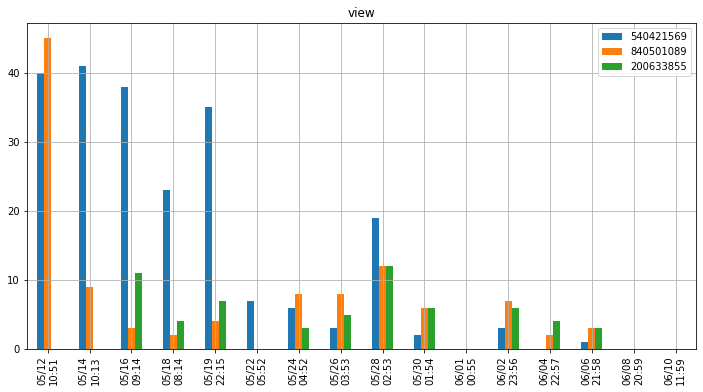

In [3]:
# 画增长量柱状图
increase(kinds=['view'], av=[540421569, 840501089, 200633855], start_time='2020-5-10 12:00', end_time='2020-6-10 12:00', interval=169200)

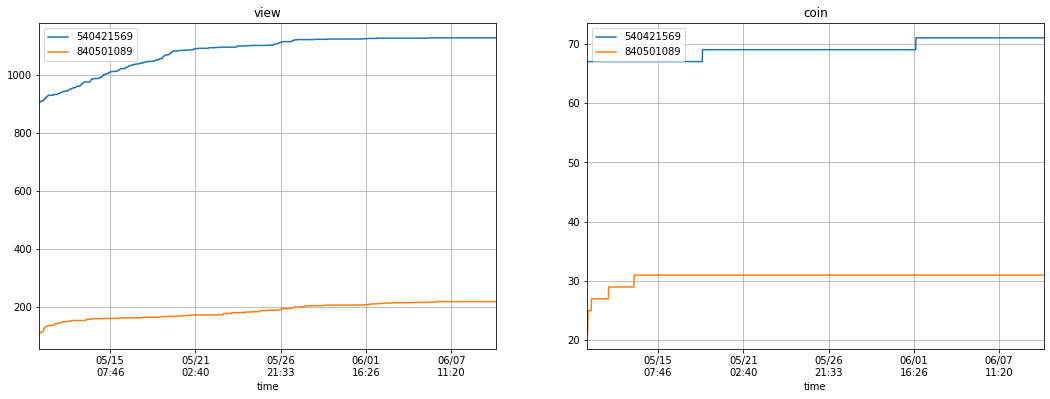

In [4]:
# 画累计折线图
accumulate(kinds=['view', 'coin'], av=[540421569, 840501089], start_time='2020-5-10 12:00', end_time='2020-6-10 12:00')